<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/CIFAR10_dataset_model_saving_criteria_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
print(tf.__version__)

cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data()

print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('x test shape: {}'.format(x_test.shape))
print('y test shape: {}'.format(y_test.shape))

labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

x_train = x_train / 255.0
x_test = x_test / 255.0

2.4.1
x train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
x test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


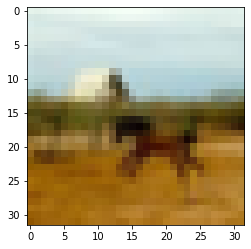

this is image of horse


In [8]:
import matplotlib.pyplot as plt
import numpy as np

inx = np.random.choice(x_train.shape[0])
img = x_train[inx]
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.show()
img_label = labels[y_train[inx][0]]
print('this is image of {}'.format(img_label))

['horse', 'airplane', 'cat', 'ship', 'frog', 'truck', 'frog', 'airplane', 'airplane', 'cat']


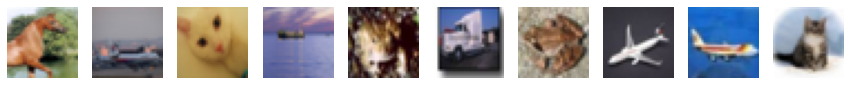

In [9]:
fig, ax = plt.subplots(1, 10, figsize=(15, 15))

img_labels=[]
for i in range(10):
  inx = np.random.choice(x_train.shape[0])
  img = x_train[inx]
  ax[i].imshow(img)
  ax[i].set_axis_off()
  img_labels.append(labels[y_train[inx][0]])
print(img_labels)


In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

def get_model():
  model = Sequential([Conv2D(filters=16, kernel_size=(3,3),
                             input_shape=(32, 32, 3), activation='relu',
                             name='Conv2D_1'),
                      Conv2D(filters=8, kernel_size=(3,3), activation='relu',
                             name='Conv2D_2'),
                      MaxPooling2D(pool_size=(4,4), name='MaxPooling2D_1'),
                      Flatten(name='flatten'),
                      Dense(32, activation='relu', name='Dense_1'),
                      Dense(10, activation='softmax', name='Dense_2')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  return model

In [10]:
model = get_model()
model.summary()
del model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
MaxPooling2D_1 (MaxPooling2D (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
Dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
__________________________________________________

In [35]:
def get_test_accuracy(model, x_test, y_test):
  test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=False)
  print('test accuracy: {acc:0.3f}'.format(acc=test_acc))

# Let's create a model with only 100 training examples, which is going to overfit.

In [13]:
x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

print('x train shape: {}'.format(x_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('x test shape: {}'.format(x_test.shape))
print('y test shape: {}'.format(y_test.shape))

x train shape: (100, 32, 32, 3)
y train shape: (100, 1)
x test shape: (100, 32, 32, 3)
y test shape: (100, 1)


# Now we're going to create a checkpoint that only saves the model weights that had the highest testing or validation accuracy.


In [15]:
model = get_model()

## Now let's create a checkpoint object which monitors the validation accuracy and only saves the weights that have higher validation accuracy.

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_best_path = 'model_checkpoint_best/checkpoint'
checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
                                  save_weights_only=True,
                                  save_freq='epoch',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  verbose=1)

In [19]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=10,
                    callbacks=[checkpoint_best],
                    verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.06000, saving model to model_checkpoint_best/checkpoint

Epoch 00002: val_accuracy improved from 0.06000 to 0.07000, saving model to model_checkpoint_best/checkpoint

Epoch 00003: val_accuracy did not improve from 0.07000

Epoch 00004: val_accuracy improved from 0.07000 to 0.08000, saving model to model_checkpoint_best/checkpoint

Epoch 00005: val_accuracy improved from 0.08000 to 0.14000, saving model to model_checkpoint_best/checkpoint

Epoch 00006: val_accuracy did not improve from 0.14000

Epoch 00007: val_accuracy did not improve from 0.14000

Epoch 00008: val_accuracy did not improve from 0.14000

Epoch 00009: val_accuracy improved from 0.14000 to 0.15000, saving model to model_checkpoint_best/checkpoint

Epoch 00010: val_accuracy did not improve from 0.15000

Epoch 00011: val_accuracy did not improve from 0.15000

Epoch 00012: val_accuracy did not improve from 0.15000

Epoch 00013: val_accuracy did not improve from 0.15000

Epoc

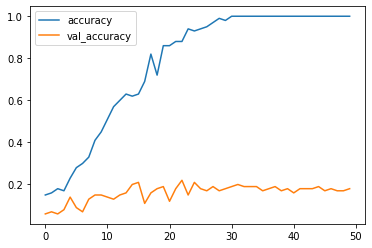

In [25]:
import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [26]:
! ls -lh model_checkpoint_best/

total 184K
-rw-r--r-- 1 root root   77 Feb 23 23:51 checkpoint
-rw-r--r-- 1 root root 174K Feb 23 23:51 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Feb 23 23:51 checkpoint.index


In [31]:
# create a new model with the saved weights

new_model = get_model()
new_model.load_weights(checkpoint_best_path)

In [36]:
get_test_accuracy(new_model, x_test, y_test)

test accuracy: 0.220


In [37]:
! ls -lh

total 8.0K
drwxr-xr-x 2 root root 4.0K Feb 23 23:51 model_checkpoint_best
drwxr-xr-x 1 root root 4.0K Feb 22 14:38 sample_data


In [38]:
! rm -r model_checkpoint_best/